In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from datetime import datetime
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set_style('whitegrid')
warnings.simplefilter("ignore")
%matplotlib notebook

## 数据预处理

In [2]:
root = './meso_learning.xlsx'
# 龙卷中气旋数据
tor_dat = pd.read_excel(root, sheet_name='T', parse_dates={'Time' : [0, 1, 2, 3, 4]},
                     date_parser=datetime, index_col=0).dropna()
# 非龙卷中气旋数据
non_tor_dat = pd.read_excel(root, sheet_name='NT', parse_dates={'Time' : [0, 1, 2, 3, 4]},
                     date_parser=datetime, index_col=0).dropna()

In [3]:
# 龙卷与非龙卷数据合并
data = pd.concat([tor_dat, non_tor_dat], axis=0)
X = pd.concat([data.iloc[:, 6:14], data.iloc[:, 15:18], data.iloc[:, 20:24]], axis=1) # 特征集合
Y = data.iloc[:, -1] # 标签集合
index_new_names, column_new_names= X.index.values, X.columns.values

In [4]:
X

,POSH,POH,MX_SIZE(CM),CELL_BASED_VIL,MAX_REF,HEIGHT(KM),BASE(KM),TOP(KM),MVMT(M/S),M_BASE(KM),M_TOP(KM),M_HGT(KM),M_DIAM_RAD(M),M_DIAM_AZ(M),M_SHEAR
Time,,,,,,,,,,,,,,,
2006-07-03 09:51:00,20,80,1.3,8.6,50.5,6.1,6.1,8.5,18.1,0.0,0.0,0.0,0,0,0.0
2006-07-03 09:57:00,0,90,0.8,4.2,45.0,8.2,8.2,10.7,29.2,0.0,0.0,0.0,0,0,0.0
2006-07-03 10:16:00,60,100,2.3,48.5,55.5,6.8,2.5,13.6,24.7,0.0,0.0,0.0,0,0,0.0
2006-07-03 10:22:00,50,100,2.1,28.9,54.5,6.6,4.6,12.7,20.7,0.0,0.0,0.0,0,0,0.0
2006-07-03 10:28:00,100,100,37.4,31.0,55.5,6.5,4.4,13.7,18.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-02 01:01:00,0,0,0.0,4.6,50.5,0.2,0.1,2.6,20.6,0.0,0.0,0.0,0,0,0.0
2017-07-02 01:07:00,0,0,0.0,4.7,48.5,0.9,0.1,2.7,17.4,0.0,0.0,0.0,0,0,0.0
2017-07-02 01:07:00,0,0,0.0,3.4,47.5,0.3,0.2,2.2,15.7,0.0,0.0,0.0,0,0,0.0


In [5]:
# 特征值进行归一化
ss = StandardScaler()
ss.fit(X) # 计算均值与方差用于下一步
xx = ss.transform(X) # 归一化
x = pd.DataFrame(xx, index=index_new_names, columns=column_new_names)
x.index.name = 'Time'
x

,POSH,POH,MX_SIZE(CM),CELL_BASED_VIL,MAX_REF,HEIGHT(KM),BASE(KM),TOP(KM),MVMT(M/S),M_BASE(KM),M_TOP(KM),M_HGT(KM),M_DIAM_RAD(M),M_DIAM_AZ(M),M_SHEAR
Time,,,,,,,,,,,,,,,
2006-07-03 09:51:00,-0.950537,0.113721,-0.326502,-1.479129,-1.268859,0.609818,1.951091,-0.660342,0.828803,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2006-07-03 09:57:00,-1.532871,0.406898,-0.414671,-1.686588,-2.376908,1.574200,3.042984,-0.077385,2.941231,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2006-07-03 10:16:00,0.214132,0.700075,-0.150164,0.402147,-0.261541,0.931279,0.079275,0.691059,2.084841,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2006-07-03 10:22:00,-0.077035,0.700075,-0.185432,-0.521988,-0.463005,0.839433,1.171167,0.452576,1.323606,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2006-07-03 10:28:00,1.378800,0.700075,6.039303,-0.422974,-0.261541,0.793510,1.067178,0.717557,0.809772,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-02 01:01:00,-1.532871,-2.231695,-0.555742,-1.667728,-1.268859,-2.099637,-1.168603,-2.223728,1.304575,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2017-07-02 01:07:00,-1.532871,-2.231695,-0.555742,-1.663013,-1.671786,-1.778176,-1.168603,-2.197229,0.695587,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266
2017-07-02 01:07:00,-1.532871,-2.231695,-0.555742,-1.724308,-1.873250,-2.053714,-1.116608,-2.329720,0.372062,-0.935671,-1.110334,-1.001872,-0.996956,-1.096013,-0.915266


In [6]:
# 处理数据，将标签字符串转换为整数
le = LabelEncoder()
y = le.fit_transform(Y)

In [7]:
# y

## 数据集切分

In [80]:
## 训练集：测试集 = 7：3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 模型训练

### 决策树

In [81]:
decesion_model = DecisionTreeClassifier()
decesion_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 支持向量机

In [82]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()


## 预测

In [83]:
## 测试集
D_ytest_pred = decesion_model.predict(X_test)
S_ytest_pred = svc_model.predict(X_test)

## 训练集
D_ytrain_pred = decesion_model.predict(X_train)
S_ytrain_pred = svc_model.predict(X_train)

## 评估

In [84]:
## 评估测试集
D_test_conf = confusion_matrix(y_test, D_ytest_pred, labels=[1, 0])
S_test_conf = confusion_matrix(y_test, S_ytest_pred, labels=[1, 0])

## 评估训练集
D_train_conf = confusion_matrix(y_train, D_ytrain_pred, labels=[1, 0])
S_train_conf = confusion_matrix(y_train, S_ytrain_pred, labels=[1, 0])

###### POD(the probability of detection) --> $POD = \frac{a}{a+c}$
###### FAR(the false alarm ratio) --> $FAR= \frac{b}{a+b}$
###### CSI(the critical success index)--> $CSI= \frac{a}{a+b+c}$

In [85]:
def score_compute(da):
    pod = da[0, 0] / np.sum(da[:, 0])
    far = da[0, 1] / np.sum(da[0, :]) # b/a+b
    csi = da[0, 1] / np.sum(da[0]) + da[1, 0] # a/a+b+c
    return pod, far, csi

In [86]:
# 训练集
D_train_pod, D_train_far, D_train_csi = score_compute(D_train_conf)
S_train_pod, S_train_far, S_train_csi = score_compute(S_train_conf)

# 测试集
D_test_pod, D_test_far, D_test_csi = score_compute(D_test_conf)
S_test_pod, S_test_far, S_test_csi = score_compute(S_test_conf)

In [87]:
result = pd.DataFrame({'POD':[D_train_pod, S_train_pod, D_test_pod, S_test_pod],
                       'FAR':[D_train_far, S_train_far, D_test_far, S_test_far],
                       'CSI':[D_train_csi, S_train_csi, D_test_csi, S_test_csi]}, 
                      index=['DEC train', 'SVC train', 'DEC test', 'SVC test'])
result

,POD,FAR,CSI
DEC train,1.000000,0.000000,0.000000
SVC train,0.952381,0.696970,1.696970
DEC test,0.461538,0.470588,21.470588
SVC test,0.750000,0.823529,2.823529


## 超参数优化

### 决策树超参数优化

In [88]:
grid_decesion = GridSearchCV(decesion_model, param_grid={'max_depth':[4, 5, 6, 7, 8, 9],
                                                         'min_samples_leaf':[3, 4, 5, 6, 7, 8],
                                                         'min_impurity_decrease':[0., 0.1, 0.2, 0.3, 0.4, 0.5]}, cv=4)
grid_decesion.fit(X_train, y_train)
Decesion_best = grid_decesion.best_estimator_

### 支持向量机超参数优化

In [89]:
grid_svc = GridSearchCV(svc_model, param_grid={'C':[0.1, 0.5, 1, 3, 5, 7, 9], # 惩罚系数
                                               'gamma':[0.01, 0.05, 0.1, 0.5, 1, 3, 5]}, cv=4) # 核函数系数， 交叉验证
grid_svc.fit(X_train, y_train)
SVC_best = grid_svc.best_estimator_

## 重新训练

In [90]:
# 决策树重新进行训练
Decesion_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8)

In [91]:
# 支持向量机重新进行训练
SVC_best.fit(X_train, y_train)

SVC(C=3, gamma=0.1)

## 预测

In [92]:
## 测试集
GD_ytest_pred = Decesion_best.predict(X_test)
GS_ytest_pred = SVC_best.predict(X_test)

## 训练集
GD_ytrain_pred = Decesion_best.predict(X_train)
GS_ytrain_pred = SVC_best.predict(X_train)

## 评估

In [93]:
## 评估测试集
GD_test_conf = confusion_matrix(y_test, GD_ytest_pred, labels=[1, 0])
GS_test_conf = confusion_matrix(y_test, GS_ytest_pred, labels=[1, 0])

## 评估训练集
GD_train_conf = confusion_matrix(y_train, GD_ytrain_pred, labels=[1, 0])
GS_train_conf = confusion_matrix(y_train, GS_ytrain_pred, labels=[1, 0])

## 评估结果对比

<IPython.core.display.Javascript object>


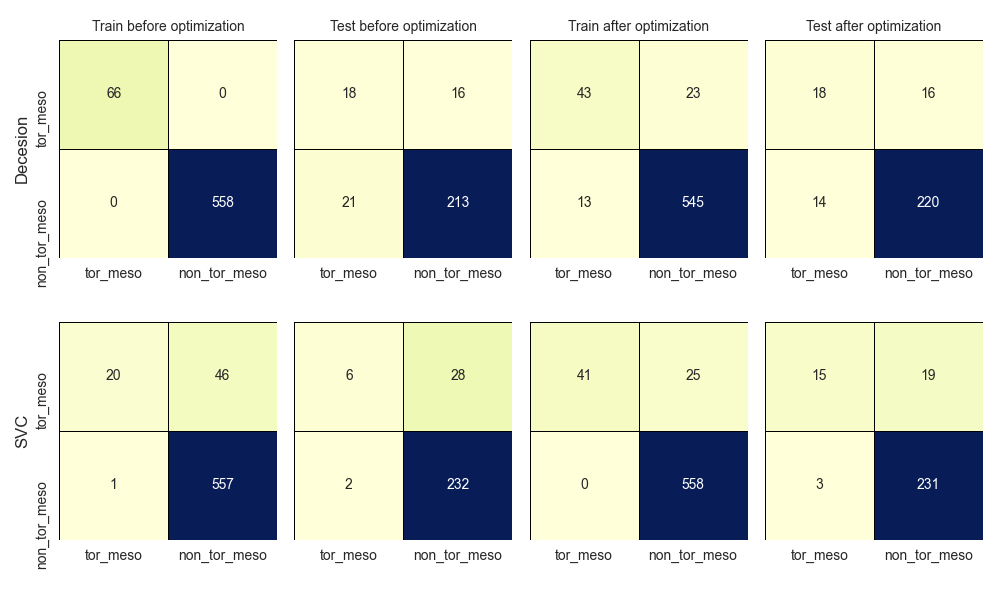

In [94]:
# 绘制混淆矩阵
titles = ['Train before optimization', 'Test before optimization', 
          'Train after optimization',   'Test after optimization']
fg, axs = plt.subplots(2, 4, sharey=True,  figsize=(10, 6))
for i, da in enumerate(zip([[D_train_conf, D_test_conf,  GD_train_conf, GD_test_conf], 
                            [S_train_conf, S_test_conf,  GS_train_conf, GS_test_conf]])):
    for j in range(4):
        sns.heatmap(da[0][j], ax=axs[i][j], square=True, annot=True, fmt='d', linewidth=0.5, linecolor='k',
                         xticklabels=['tor_meso', 'non_tor_meso'], yticklabels=['tor_meso', 'non_tor_meso'],
                         cbar=False, cmap="YlGnBu")
        axs[0][j].set_title(titles[j], fontsize=10)
    axs[0][0].set_ylabel('Decesion', fontsize=12)
    axs[1][0].set_ylabel('SVC', fontsize=12) 
fg.tight_layout()
fg.savefig('confusion_matrix.png')

## 预测错误样本数据

In [95]:
predict_problem = X_test.loc[np.logical_and(y_test != GD_ytest_pred, y_test==1), :]
inverse_index,  inverse_columns= predict_problem.index.values, predict_problem.columns.values

In [96]:
predict_inverse = ss.inverse_transform(predict_problem)
predict_res = pd.DataFrame(predict_inverse, index=inverse_index, columns=inverse_columns)
predict_res.index.name = 'Time'
predict_res.to_csv('predict_problem.csv')

In [97]:
# predict_res

## 特征重要程度

In [98]:
color = sns.color_palette()
feature_names = np.array(['POSH', 'POH', 'MX_SIZE', 'CELL_BASED_VIL', 'MAX_REF',
                'HEIGHT', 'BASE', 'TOP',  'MVMT', 'M_BASE','M_TOP',
                'M_HGT', 'M_DIAM_RAD', 'M_DIAM_AZ', 'M_SHEAR'])
GD_feature_importance = Decesion_best.feature_importances_
# 特征重要性排序
GD_sorted_idx = np.argsort(GD_feature_importance)

<IPython.core.display.Javascript object>


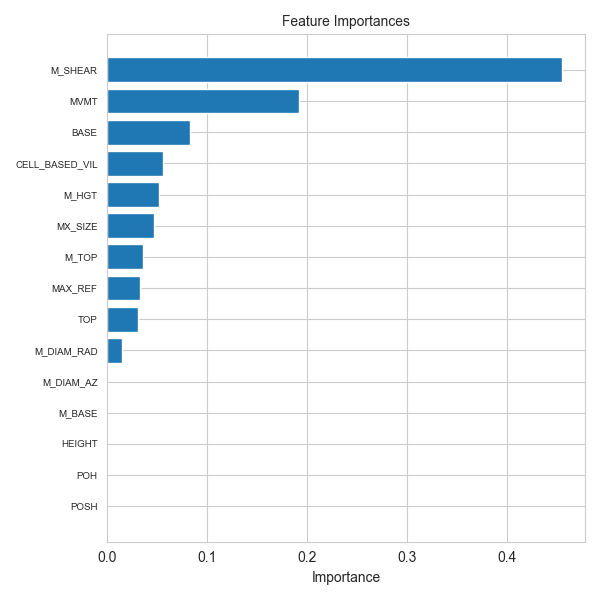

In [99]:
fg, ax = plt.subplots(figsize=(6, 6))
ax.barh(range(len(GD_sorted_idx)), GD_feature_importance[GD_sorted_idx], align='center')
ax.set_title('Feature Importances', fontsize=10)
ax.set_xlabel('Importance', fontsize=10)
plt.yticks(range(len(GD_sorted_idx)), feature_names[GD_sorted_idx], fontsize=7)
fg.tight_layout()

## 决策树

In [100]:
feature_names = ['POSH', 'POH', 'MX_SIZE', 'CELL_BASED_VIL', 'MAX_REF','HEIGHT', 'BASE', 'TOP', 
                 'MVMT', 'M_BASE','M_TOP', 'M_HGT', 'M_DIAM_RAD', 'M_DIAM_AZ', 'M_SHEAR']
label_names = ['TOR_MES', 'NON_TOR_MES']

<IPython.core.display.Javascript object>


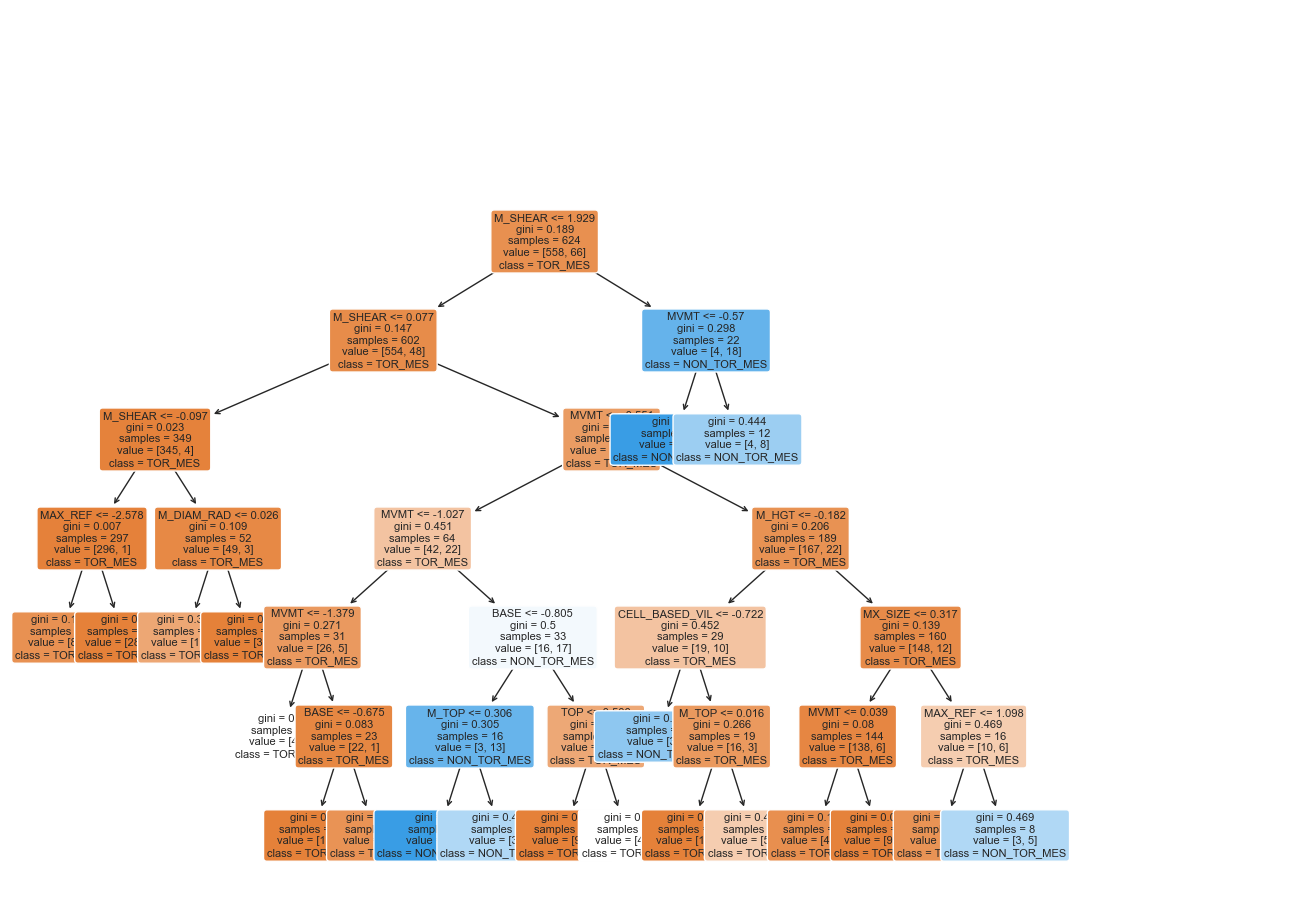

In [101]:
fg, ax = plt.subplots(figsize=(13, 9))
_ = tree.plot_tree(Decesion_best, feature_names=feature_names, rounded=True, fontsize=8,
               class_names=label_names, filled=True, ax=ax)
fg.tight_layout()

In [30]:
# fg.savefig('tree.pdf')